In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

In [6]:
train_images.shape

(60000, 28, 28, 1)

In [7]:
# train_images[1]

In [8]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [10]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False
)

In [11]:
augmented_data = datagen.flow(train_images, train_labels, batch_size=60000, shuffle=False)
augmented_images, augmented_labels = next(augmented_data)

In [12]:
augmented_images.shape

(60000, 28, 28, 1)

In [13]:
train_images_augmented = np.concatenate((train_images, augmented_images))
train_labels_augmented = np.concatenate((train_labels, augmented_labels))

In [14]:
train_images_augmented.shape

(120000, 28, 28, 1)

In [15]:
train_labels_augmented.shape

(120000, 10)

In [16]:
train_labels_augmented[70000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

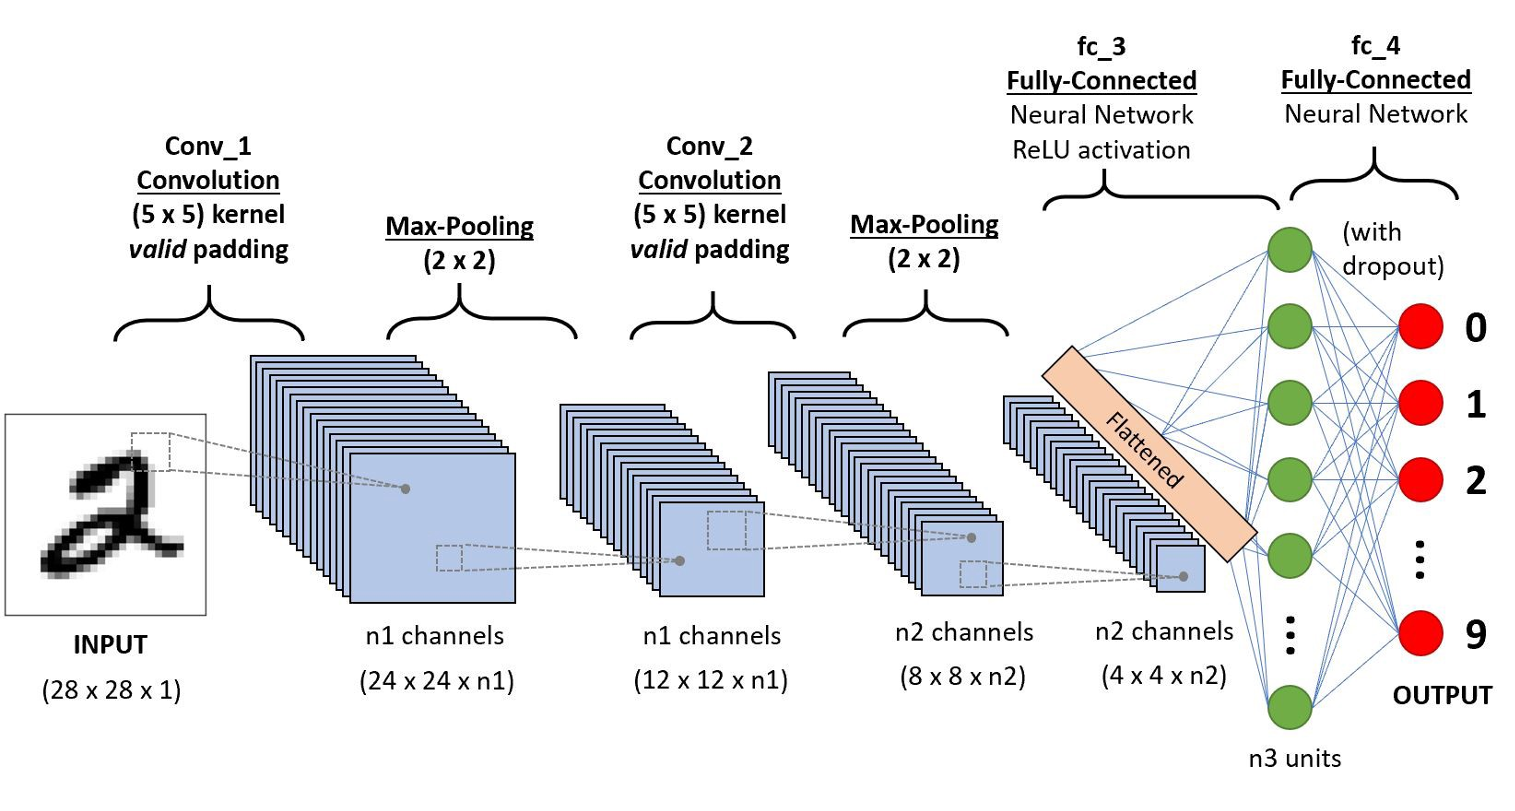

In [17]:
# Build CNN Model
n1 = 32
n2 = 64
n3 = 128

model = Sequential()

model.add(Conv2D(n1, (5, 5), activation='relu', input_shape=(28, 28, 1), padding='valid'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(n2, (5, 5), activation='relu', padding='valid'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(n3, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_images_augmented, train_labels_augmented,
                    epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 11s 5ms/step - loss: 0.2400 - accuracy: 0.9259 - val_loss: 0.1086 - val_accuracy: 0.9668
Epoch 2/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0770 - accuracy: 0.9769 - val_loss: 0.0814 - val_accuracy: 0.9753
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0534 - accuracy: 0.9840 - val_loss: 0.0684 - val_accuracy: 0.9809
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0440 - accuracy: 0.9867 - val_loss: 0.0597 - val_accuracy: 0.9826
Epoch 5/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0357 - accuracy: 0.9892 - val_loss: 0.0539 - val_accuracy: 0.9844
Epoch 6/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0300 - accuracy: 0.9907 - val_loss: 0.0501 - val_accuracy: 0.9859
Epoch 7/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0264 - accuracy: 0.9916 - val_loss: 0.0498 - val_accuracy

In [20]:
type(history)

keras.src.callbacks.History

In [21]:
history.history['loss']

[0.24004711210727692,
 0.07700897008180618,
 0.0534321591258049,
 0.04399411380290985,
 0.035692617297172546,
 0.030004242435097694,
 0.026411274448037148,
 0.02303820289671421,
 0.020410198718309402,
 0.019173230975866318,
 0.01627279631793499,
 0.014226313680410385,
 0.015314917080104351,
 0.013378715142607689,
 0.012627504765987396,
 0.012296384200453758,
 0.011553624644875526,
 0.010819748975336552,
 0.011789667420089245,
 0.009831375442445278,
 0.01022128015756607,
 0.00925531517714262,
 0.008962687104940414,
 0.008784119971096516,
 0.00947886984795332,
 0.008442135527729988,
 0.008055715821683407,
 0.0093385586515069,
 0.006912830285727978,
 0.009535595774650574,
 0.006790338084101677,
 0.00907944142818451,
 0.007942498661577702,
 0.006796748377382755,
 0.006326322443783283,
 0.0077112698927521706,
 0.007669748738408089,
 0.007713921833783388,
 0.007231683935970068,
 0.006708445958793163,
 0.0070325150154531,
 0.0068948594853281975,
 0.007829162292182446,
 0.007211430463939905,
 

In [22]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [23]:
# predictions

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss, test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0613 - accuracy: 0.9931
0.06132043898105621 0.9930999875068665


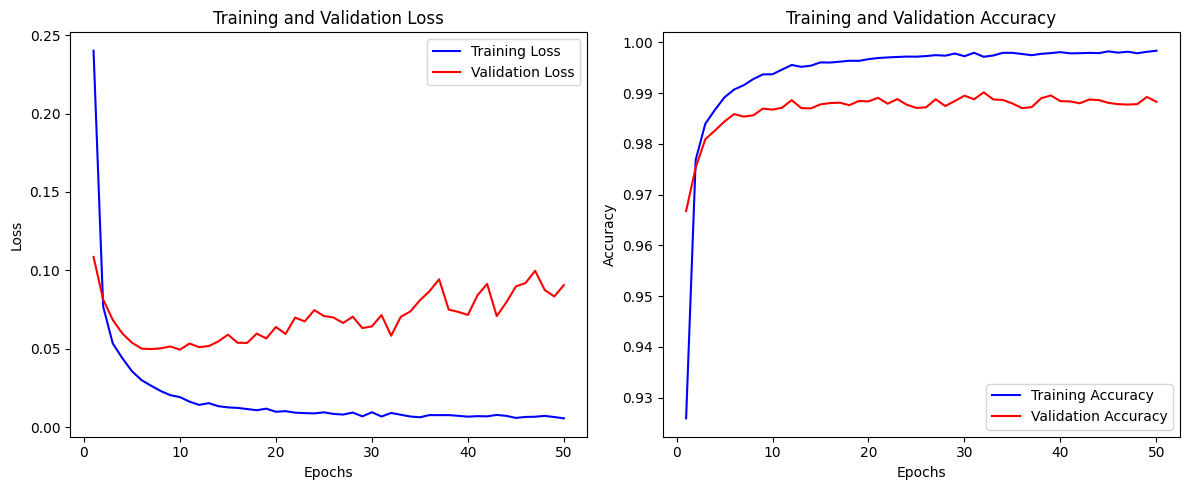

In [25]:
# Plotting training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()